In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Animal_pose import Animal_pose
from spikeA.Session import Session
import spikeA.spatial_properties

import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters

In [2]:
path="/d64/data/electro/bt0975/bt0975-28092021-0105"
name="bt0975-28092021-0105"

In [3]:
ses = Kilosort_session(name=name,path=path)
ses.load_parameters_from_files()
print(ses)

<class 'spikeA.Session.Kilosort_session'>
name = bt0975-28092021-0105
path = /d64/data/electro/bt0975/bt0975-28092021-0105
subject = bt0975
session_dat_time = 2021-09-28 01:05:00
fileBase = /d64/data/electro/bt0975/bt0975-28092021-0105/bt0975-28092021-0105
file_names = {'par': '/d64/data/electro/bt0975/bt0975-28092021-0105/bt0975-28092021-0105.par', 'desen': '/d64/data/electro/bt0975/bt0975-28092021-0105/bt0975-28092021-0105.desen', 'desel': '/d64/data/electro/bt0975/bt0975-28092021-0105/bt0975-28092021-0105.desel', 'sampling_rate': '/d64/data/electro/bt0975/bt0975-28092021-0105/bt0975-28092021-0105.sampling_rate_dat', 'px_per_cm': '/d64/data/electro/bt0975/bt0975-28092021-0105/bt0975-28092021-0105.px_per_cm', 'params': '/d64/data/electro/bt0975/bt0975-28092021-0105/params.py', 'amplitudes': '/d64/data/electro/bt0975/bt0975-28092021-0105/amplitudes.npy', 'channel_map': '/d64/data/electro/bt0975/bt0975-28092021-0105/channel_map.npy', 'channel_positions': '/d64/data/electro/bt0975/bt0975

In [4]:
stl = Spike_train_loader()
stl.load_spike_train_kilosort(ses)
cg = Cell_group(stl)

Number of good clusters: 37


In [5]:
ap = Animal_pose(ses)

fn = ap.ses.fileBase+ap.pose_file_extension
print(fn)

if os.path.exists(fn):
    print("npy file found:",fn)
    ap.load_pose_from_file()
else:
    print("load from positrack")
    ap.pose_from_positrack_files(ses=ses, interpolation_frequency_hz = 50,extension="trk")
    #print("save to npy for later use")
    #ap.save_pose_to_file() # save the file for next time
    

/d64/data/electro/bt0975/bt0975-28092021-0105/bt0975-28092021-0105.pose.npy
npy file found: /d64/data/electro/bt0975/bt0975-28092021-0105/bt0975-28092021-0105.pose.npy
Loading original pose from /d64/data/electro/bt0975/bt0975-28092021-0105/bt0975-28092021-0105.pose.npy


In [6]:
circ80_indices = [i for i, j in enumerate(ses.desen) if j == 'circ80']
first_circ80_index = circ80_indices[0]

first_circ80_inter = ses.trial_intervals.inter[first_circ80_index] # first circ80

print(first_circ80_inter)

ap.unset_intervals()
ap.set_intervals(np.array([first_circ80_inter]))



[   0.      1267.52395]


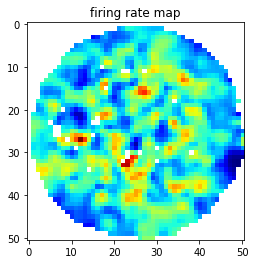

found 151 peaks
(103, 103) [44, 55, 39, 60, 62, 65, 33, 55, 74, 27, 76, 31, 78, 81, 21, 44, 65, 73, 38, 84, 17, 57, 79, 42, 49, 70, 13, 21, 57, 91, 31, 69, 93, 10, 43, 19, 52, 75, 95, 87, 11, 16, 72, 63, 26, 4, 72, 98, 36, 42, 48, 3, 14, 67, 24, 86, 10, 55, 7, 93, 39, 47, 20, 51, 79, 32, 100, 7, 2, 17, 42, 66, 51, 36, 60, 85, 100, 95, 2, 70, 82, 55, 63, 9, 47, 92, 16, 78, 35, 88, 99, 54, 60, 66, 4, 36, 98, 48, 76, 39, 86, 13, 15, 79, 7, 27, 50, 55, 59, 90, 92, 9, 33, 71, 11, 45, 81, 89, 22, 15, 32, 53, 60, 23, 45, 85, 18, 64, 29, 37, 58, 81, 21, 40, 76, 24, 71, 26, 48, 75, 28, 65, 47, 69, 37, 53, 40, 63, 47, 55, 58] [2, 2, 3, 3, 3, 4, 5, 5, 7, 8, 8, 9, 9, 11, 12, 13, 13, 13, 14, 14, 16, 16, 16, 17, 17, 17, 21, 21, 21, 21, 23, 24, 24, 25, 25, 27, 27, 27, 28, 31, 32, 32, 32, 33, 34, 35, 35, 35, 36, 37, 37, 39, 39, 39, 40, 40, 42, 42, 43, 43, 44, 44, 45, 45, 45, 46, 46, 47, 48, 49, 49, 49, 51, 53, 53, 53, 54, 55, 56, 56, 57, 58, 58, 59, 60, 60, 62, 62, 63, 63, 63, 65, 65, 66, 67, 67, 67, 

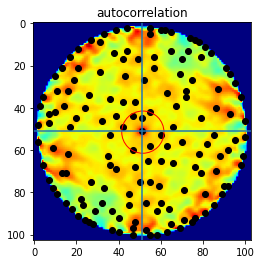

In [7]:
import math

n = cg.neuron_list[0]
n.set_spatial_properties(ap)
n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True)
plt.imshow(n.spatial_properties.firing_rate_map, cmap='jet')
plt.title("firing rate map")
plt.show()

n.spatial_properties.spatial_autocorrelation_map_2d()
plt.imshow(n.spatial_properties.spatial_autocorrelation_map, cmap='jet')
plt.title("autocorrelation")

x,y = n.spatial_properties.spatial_autocorrelation_field_detection(.05, 4)
plt.axhline(y=51)
plt.axvline(x=51)
plt.scatter(x,y, color='black')

print("found",len(x),"peaks")
print(n.spatial_properties.spatial_autocorrelation_map.shape,x,y)

print(np.where(n.spatial_properties.spatial_autocorrelation_map==1.))




r_inner = 10
r_outer_range = np.linspace(10,50,100)

midpoint = np.array(n.spatial_properties.spatial_autocorrelation_map.shape)/2
print("midpoint = origin of coordinate system:",midpoint)

r_outer_radii = []

for r_outer in r_outer_range:
    points_inside_dougnut= [ (x_,y_) for x_,y_ in zip(x,y) if r_outer/2 < math.dist(midpoint, [x_,y_]) < r_outer ]
    #print(r_outer,len(points_inside_dougnut))
    
    if(len(points_inside_dougnut)==6):
        r_outer_radii.append(r_outer)

r_outer_radius_use = np.mean(r_outer_radii)

print("outer radius:",r_outer_radius_use)


circle1 = plt.Circle((midpoint[0], midpoint[1]), r_outer_radius_use, color='r' , fill=False)

fig = plt.gcf()
ax = fig.gca()

ax.add_patch(circle1)

plt.show()

midpoint = origin of coordinate system: [51.5 51.5]


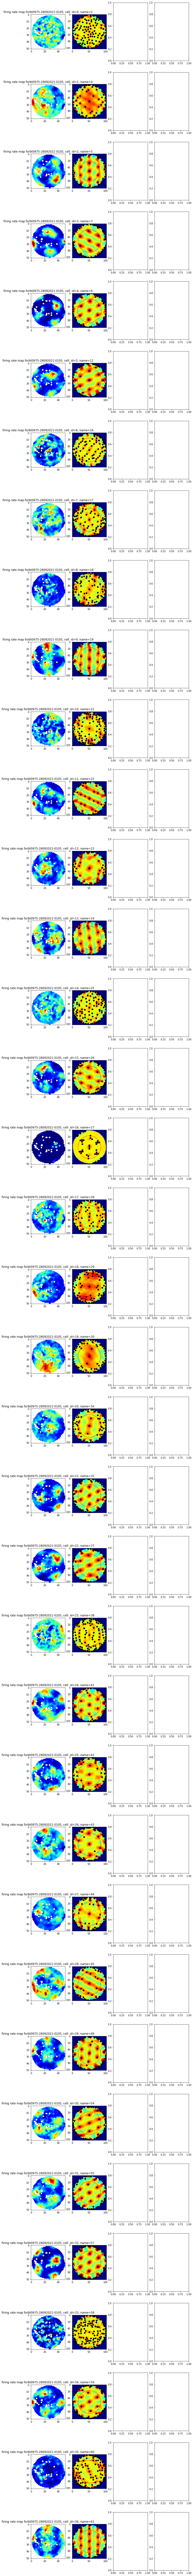

In [8]:
midpoint = np.array(cg.neuron_list[0].spatial_properties.spatial_autocorrelation_map.shape)/2
print("midpoint = origin of coordinate system:",midpoint)
r_outer_range = np.linspace(10,50,100)


# calculate firing map for all neurons

fig, axs = plt.subplots(len(cg.neuron_list),4,figsize=(12,200))

for i, n in enumerate(cg.neuron_list):
        
    n.set_spatial_properties(ap)
    
    n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True)
    axs[i,0].imshow(n.spatial_properties.firing_rate_map, cmap='jet')
    axs[i,0].set_title("firing rate map for"+name+", cell: id="+str(i)+", name="+n.name)

    
    n.spatial_properties.spatial_autocorrelation_map_2d()
    axs[i,1].imshow(n.spatial_properties.spatial_autocorrelation_map, cmap='jet')
    
    x,y = n.spatial_properties.spatial_autocorrelation_field_detection(threshold = 0.1, neighborhood_size = 5)
    axs[i,1].scatter(x,y, color='black')
    
    
    
    
    # find proper dimensions for doughnut
    for r_outer in r_outer_range:
        points_inside_dougnut= [ (x_,y_) for x_,y_ in zip(x,y) if r_outer/2 < math.dist(midpoint, [x_,y_]) < r_outer ]
        if(len(points_inside_dougnut)==6):
            r_outer_radii.append(r_outer)
    r_outer_radius_use = np.mean(r_outer_radii)

    circle1 = plt.Circle((midpoint[0], midpoint[1]), r_outer_radius_use, color='r' , fill=False)

    axs[i,1].add_patch(circle1)
    
    
    
    
    
    
    
    
    

plt.show()
    

    
    
    